# Importing needed libraries 


In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Time Series Tasks 

1. Convert the longitudinal blood pressure measurements into a proper time series:
   - Create a pandas Series with DatetimeIndex using `visit_date`
   - Handle any missing or duplicate measurements appropriately
   - Tips: 
     - Use `pd.to_datetime()` with format='%Y-%m-%d' for reliable parsing
     - Handle duplicates with `duplicated()` and appropriate aggregation
     - Consider timezone handling with `tz_localize()` if needed
     - Use `interpolate()` or `fillna()` for missing values

In [25]:
#Reading in data and converting it to Pandas Dataframe 
long_data = pd.read_csv("/Users/MuskaanSandhu/08-time-stats-and-ml-muskaansandhu/patient_longitudinal.csv", sep = '\t')
long_data = pd.DataFrame(long_data)

#Converting visit_date to DateTime object and changing index of dataframe to visit_date 
long_data['visit_date'] = pd.to_datetime(long_data['visit_date'], format='%Y-%m-%d')
long_data.set_index('visit_date', inplace=True)


#Checking for NAs and duplicated values 
long_data.isna().sum() #There are no missing values, no need to use interpolate() or fillna()
long_data.duplicated().sum() #There are no duplicated values

long_data.head()

,patient_id,bp_systolic,heart_rate,adverse_event,age,sex,bmi,smoking,diabetes
visit_date,,,,,,,,,
2023-01-17,0,108.6,72.4,0,57.5,0.0,25.8,0.0,0.0
2023-02-22,0,104.8,71.9,0,57.5,0.0,25.8,0.0,0.0
2023-03-23,0,106.3,76.2,0,57.5,0.0,25.8,0.0,0.0
2023-04-16,0,110.8,76.5,0,57.5,0.0,25.8,0.0,0.0
2023-06-05,0,117.7,78.4,0,57.5,0.0,25.8,0.0,0.0


2. Analyze blood pressure trends:
   - Resample the data to monthly frequency using mean aggregation
   - Calculate 3-month moving averages to smooth out short-term fluctuations
   - Visualize both the original and smoothed trends
   - Tips:
     - Use `resample('ME').mean()` for month-end frequency
     - Add `min_periods` to `rolling()` to handle edge cases
     - Consider `interpolate()` method for gaps
     - Use `ewm()` for exponential weighted alternatives

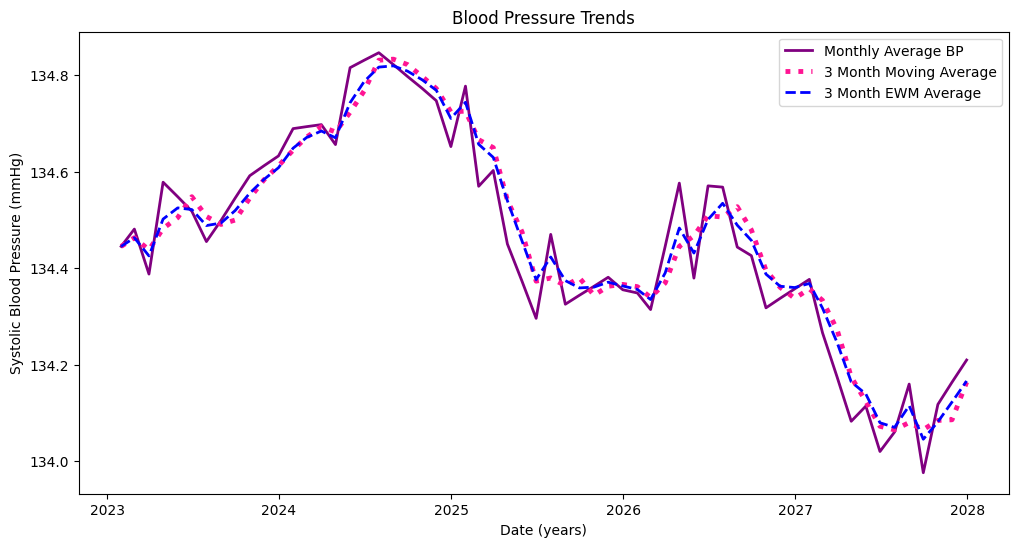

In [45]:
#Resampling data to monthly frequencies using mean aggregation 
SBP_monthly = long_data['bp_systolic'].resample('ME').mean()

#Checking for missing values 
SBP_monthly.isna().sum() #There are 15 months with missing values 

#Interpolating missing values 
SBP_monthly = SBP_monthly.interpolate()

#Calculating 3 month moving averages to smooth out short-term flunctuations 
SBP_3month = SBP_monthly.rolling(window=3, min_periods=1).mean()

#Using ewm() for exponential weighted averages 
SBP_3month_ewm = SBP_monthly.ewm(span=3, adjust=False).mean()

#Plotting all three curves 
plt.figure(figsize=(12, 6))
plt.plot(SBP_monthly, label='Monthly Average BP', color='purple', linewidth=2)
plt.plot(SBP_3month, label='3 Month Moving Average', color='deeppink', linestyle='dotted', linewidth=3.5)
plt.plot(SBP_3month_ewm, label='3 Month EWM Average', color='blue', linestyle='dashed', linewidth=2)

plt.title('Blood Pressure Trends')
plt.xlabel('Date (years)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.legend()
plt.show()

# Statistical Modeling Tasks 

1. Analyze factors affecting baseline blood pressure:
   - Use statsmodels OLS to predict `bp_systolic`
   - Include `age`, `bmi`, `smoking`, and `diabetes` as predictors
   - Interpret the coefficients and their p-values
   - Assess model fit using R-squared and diagnostic plots
   - Tips:
     - Create feature matrix `X` with predictors and add constant term using `sm.add_constant()`
     - Use `sm.OLS(y, X).fit()` to fit the model
     - Use `summary()` to examine p-values and confidence intervals
     - Plot residuals vs fitted values and Q-Q plot
     - Consider robust standard errors with `HC3` covariance type

# CONSIDER HC3 COVARIANCE TYPE?

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     150.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.65e-100
Time:                        12:17:38   Log-Likelihood:                -3700.7
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     995   BIC:                             7436.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4929      2.000     54.252      0.0

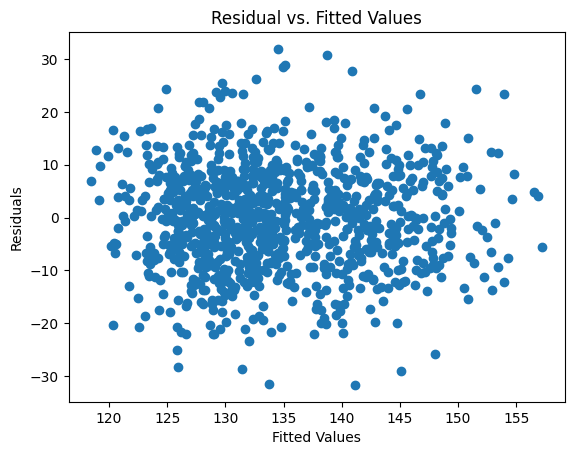

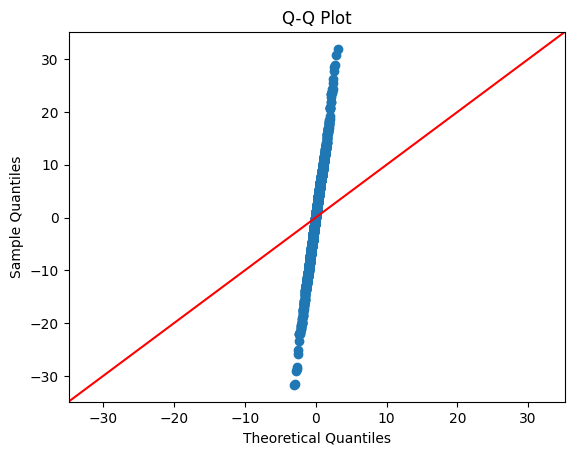

In [67]:
#Loading in baseline dataset
baseline_data = pd.read_csv("/Users/MuskaanSandhu/08-time-stats-and-ml-muskaansandhu/patient_baseline.csv", sep = '\t')

#Predictor variables (age, smoking, BMI, and diabetes)
predictors = baseline_data[['age', 'smoking', 'bmi', 'diabetes']]

#Outcome variable 
outcome = baseline_data['bp_systolic']

#Adding constant term 
predictors = sm.add_constant(predictors)

#Setting up OLS model 
OLS_model = sm.OLS(outcome,predictors).fit()

#Printing summary results of model 
print(OLS_model.summary())

#Plotting residuals vs. fitted values 
plt.scatter(OLS_model.fittedvalues, OLS_model.resid)
plt.title('Residual vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#Plotting Q-Q plot 
sm.qqplot(OLS_model.resid, line='45')
plt.title('Q-Q Plot')
plt.show()


# ADD INTERPRETATION

2. Model treatment effectiveness:
   - Fit a GLM with binomial family to predict treatment success
   - Use baseline characteristics and `adherence` as predictors
   - Report odds ratios and their confidence intervals
   - Assess model fit using deviance and diagnostic plots
   - Tips:
     - Create feature matrix `X` with predictors and add constant term
     - Use `sm.GLM(y, X, family=sm.families.Binomial()).fit()`
     - Get odds ratios with `np.exp(params)`
     - Check residual deviance vs null deviance
     - Use `influence()` to detect influential observations

In [ ]:
#Loading in treatment dataset 
treatment_data = pd.read_csv('/Users/MuskaanSandhu/08-time-stats-and-ml-muskaansandhu/patient_treatment.csv', sep='\t')

#Defining predictors (age, sex, bmi, smoking, diabetes, adherence)
predictors_GLM = treatment_data[['age', 'sex', 'bmi', 'smoking', 'diabetes', 'adherence']]

#Defining outcome variable 
outcome_GLM = treatment_data['outcome']

#Adding constant term to predictors 


,patient_id,age,sex,bmi,smoking,diabetes,bp_systolic,cholesterol,heart_rate,treatment,adherence,outcome
0,0,57.5,0,25.8,0,0,108.7,257.9,79.3,0,0.81,0
1,1,47.9,0,23.2,0,0,149.4,155.9,75.4,1,0.91,1
2,2,59.7,1,29.0,0,0,136.7,220.7,85.0,1,0.73,1
3,3,72.8,1,34.6,0,1,141.0,205.7,78.0,1,0.91,1
4,4,46.5,0,17.5,0,0,129.0,186.8,95.2,0,0.77,0
